In [1]:
import pandas as pd
import numpy as np
import functions
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [2]:
df1 = pd.read_csv("fifa21_train.csv")
df1

,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,...,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159lbs,...,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",134lbs,...,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",152lbs,...,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",150lbs,...,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,232504,B. Böðvarsson,25,Iceland,Jagiellonia Białystok,LB,LB,Jagiellonia Białystok 2018 ~ 2021,"6'1""",168lbs,...,60+2,60+2,63+2,63+2,61+2,61+2,61+2,63+2,16+2,65
11697,214680,G. Gallon,27,France,ESTAC Troyes,GK,GK,ESTAC Troyes 2019 ~ 2022,"6'1""",174lbs,...,26+2,26+2,25+2,24+2,26+2,26+2,26+2,24+2,69+2,70
11698,221489,J. Flores,22,Chile,CD Antofagasta,RM,LM CAM RM,CD Antofagasta 2019 ~ 2024,"5'6""",143lbs,...,44+2,44+2,49+2,45+2,35+2,35+2,35+2,45+2,17+2,67
11699,146717,Anderson Silva,26,Brazil,Barnsley,CM,NaN,Barnsley 2010,"6'2""",179lbs,...,68+0,68+0,66+0,64+0,60+0,60+0,60+0,64+0,25+0,68


In [3]:
df1 = functions.master_func(df1)

In [4]:
df1

,id,name,age,nationality,club,bp,position,team_&_contract,height,weight,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,175.26,161,...,60,60,60,60,59,55,55,55,59,16
1,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan",182.88,159,...,55,55,55,59,55,50,50,50,55,20
2,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,162.56,134,...,58,58,58,61,55,43,43,43,55,14
3,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,177.80,152,...,60,60,60,58,59,60,60,60,59,16
4,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,180.34,150,...,66,66,66,66,65,63,63,63,65,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11695,196848,I. Ávila,29,Peru,Melgar FBC,ST,ST,Melgar FBC 2019 ~ 2021,170.18,154,...,47,47,47,48,46,45,45,45,46,21
11696,232504,B. Böðvarsson,25,Iceland,Jagiellonia Białystok,LB,LB,Jagiellonia Białystok 2018 ~ 2021,185.42,168,...,62,62,62,65,65,63,63,63,65,18
11697,214680,G. Gallon,27,France,ESTAC Troyes,GK,GK,ESTAC Troyes 2019 ~ 2022,185.42,174,...,28,28,28,27,26,28,28,28,26,71
11698,221489,J. Flores,22,Chile,CD Antofagasta,RM,LM CAM RM,CD Antofagasta 2019 ~ 2024,167.64,143,...,46,46,46,51,47,37,37,37,47,19


In [5]:
num = df1.select_dtypes(np.number)
num

,id,age,height,weight,growth,value,wage,release_clause,attacking,crossing,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,184383,26,175.26,161,1,525000,4000,801000,258,54,...,60,60,60,60,59,55,55,55,59,16
1,188044,30,182.88,159,0,8500000,23000,0,365,66,...,55,55,55,59,55,50,50,50,55,20
2,184431,33,162.56,134,0,9000000,49000,15300000,336,73,...,58,58,58,61,55,43,43,43,55,14
3,233796,22,177.80,152,13,275000,4000,694000,242,44,...,60,60,60,58,59,60,60,60,59,16
4,234799,23,180.34,150,8,725000,2000,1400000,249,49,...,66,66,66,66,65,63,63,63,65,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11695,196848,29,170.18,154,0,550000,500,1200000,290,36,...,47,47,47,48,46,45,45,45,46,21
11696,232504,25,185.42,168,5,625000,3000,891000,224,62,...,62,62,62,65,65,63,63,63,65,18
11697,214680,27,185.42,174,4,1600000,4000,2900000,84,12,...,28,28,28,27,26,28,28,28,26,71
11698,221489,22,167.64,143,8,1100000,2000,1700000,286,64,...,46,46,46,51,47,37,37,37,47,19


In [6]:
num.columns

Index(['id', 'age', 'height', 'weight', 'growth', 'value', 'wage',
       'release_clause', 'attacking', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'skill', 'dribbling',
       'curve', 'fk_accuracy', 'long_passing', 'ball_control', 'movement',
       'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance',
       'power', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'mentality', 'aggression', 'interceptions', 'positioning', 'vision',
       'penalties', 'composure', 'defending', 'marking', 'standing_tackle',
       'sliding_tackle', 'goalkeeping', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes', 'total_stats',
       'base_stats', 'w/f', 'sm', 'ir', 'pac', 'sho', 'pas', 'dri', 'def',
       'phy', 'hits', 'ova', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw',
       'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm',
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb

<AxesSubplot:>

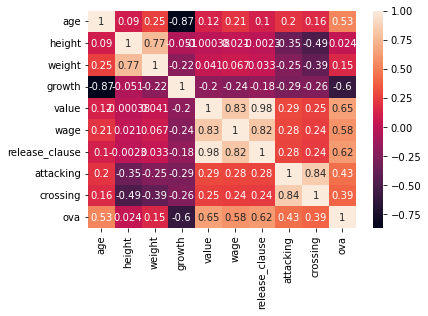

In [7]:
num_1 = num[['age', 'height', 'weight', 'growth', 'value', 'wage',
       'release_clause', 'attacking', 'crossing', "ova"]].copy()
                     
sns.heatmap(num_1.corr(), annot=True)

<AxesSubplot:>

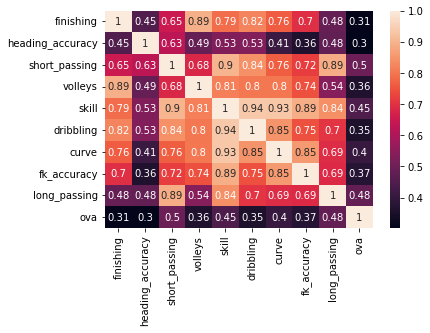

In [8]:
num_2 = num[['finishing','heading_accuracy', 'short_passing', 'volleys', 'skill', 
                        'dribbling','curve', 'fk_accuracy', 'long_passing', 'ova']].copy()

sns.heatmap(num_2.corr(), annot=True)

<AxesSubplot:>

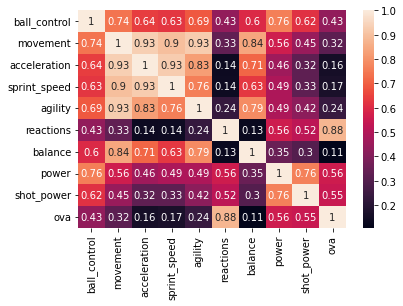

In [9]:
num_3 = num[['ball_control', 'movement',
       'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance',
       'power', 'shot_power', 'ova']].copy()

sns.heatmap(num_3.corr(), annot=True)

<AxesSubplot:>

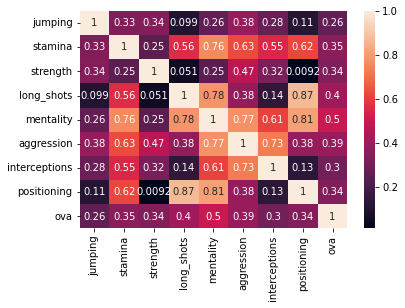

In [10]:
num_4 = num[['jumping', 'stamina', 'strength', 'long_shots',
       'mentality', 'aggression', 'interceptions', 'positioning', "ova"]].copy()
            
sns.heatmap(num_4.corr(), annot=True)

<AxesSubplot:>

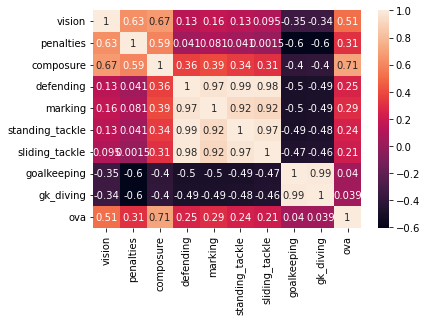

In [11]:
num_5 = num[['vision','penalties', 'composure', 'defending', 'marking', 'standing_tackle',
                        'sliding_tackle', 'goalkeeping', 'gk_diving', 'ova']]

sns.heatmap(num_5.corr(), annot=True)

<AxesSubplot:>

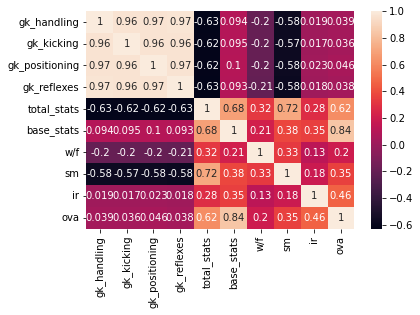

In [12]:
num_6= num[['gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes', 'total_stats',
       'base_stats', 'w/f', 'sm', 'ir','ova']]

sns.heatmap(num_6.corr(), annot=True)

<AxesSubplot:>

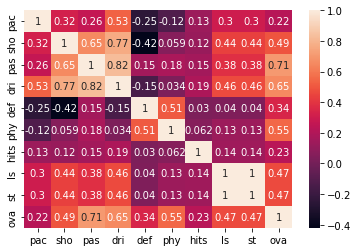

In [13]:
num_7 = num[['pac', 'sho', 'pas', 'dri', 'def',
       'phy', 'hits', 'ls', 'st', "ova"]].copy()

sns.heatmap(num_7.corr(), annot=True)

<AxesSubplot:>

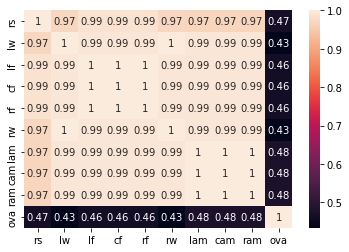

In [14]:
num_8 = num[['rs', 'lw', 'lf', 'cf', 'rf', 'rw',
                        'lam', 'cam', 'ram', 'ova']].copy()

sns.heatmap(num_8.corr(), annot=True)

<AxesSubplot:>

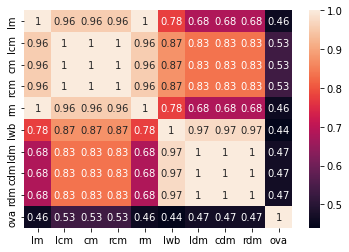

In [15]:
num_9=num[['lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm',
       'cdm', 'rdm', 'ova']]

sns.heatmap(num_9.corr(), annot=True)

<AxesSubplot:>

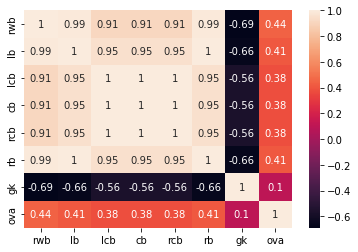

In [16]:
num_10 = num[['rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk', "ova"]].copy()

sns.heatmap(num_10.corr(), annot=True)

<AxesSubplot:>

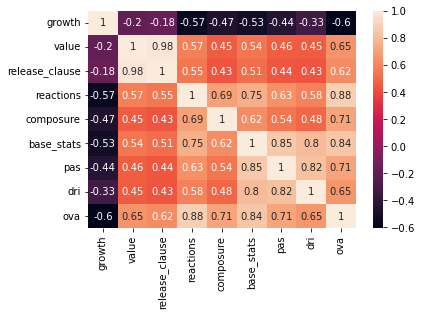

In [17]:
num_selected = num[["growth","value","release_clause","reactions","composure","base_stats","pas","dri","ova"]].copy()

sns.heatmap(num_selected.corr(), annot=True)

In [18]:
y = pd.DataFrame(num["ova"])
X_1 = num[["reactions","base_stats"]].copy()
X_2 = num[["reactions","composure","base_stats"]].copy()
X_3 = num[["value","reactions","composure","base_stats"]].copy()
X_4 = num[["value","reactions","composure","base_stats","pas"]].copy()

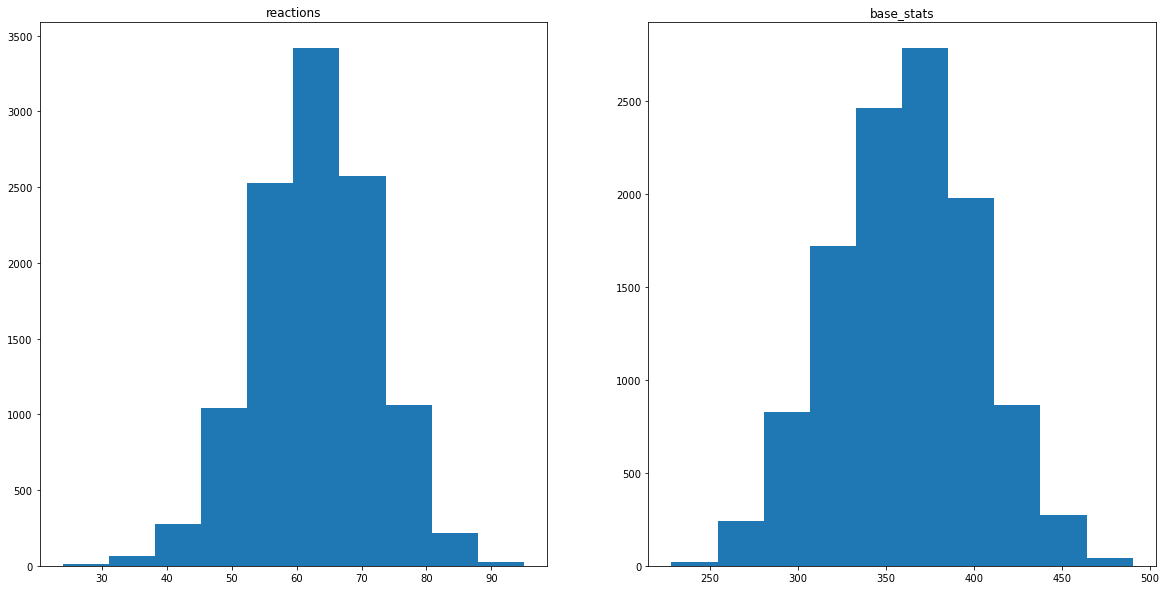

In [19]:
def hist_maker(df):
    cols = list(df.columns)
    x = len(cols)
    fig, ax = plt.subplots(1,x, figsize=(20,10))
    
    for col in cols:
        y = cols.index(col)
        ax[y].hist(data=df, x=col)
        ax[y].set_title(col)
        
    return

hist_maker(X_1)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size=0.3, random_state=22)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7847, 2)
(3364, 2)
(7847, 1)
(3364, 1)


In [21]:
transformer = MinMaxScaler()
transformer.fit(X_train)
X_train_norm = transformer.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, columns=X_train.columns)
X_test_norm = transformer.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, columns=X_train.columns)
X_train_norm

,reactions,base_stats
0,0.557143,0.583969
1,0.657143,0.641221
2,0.728571,0.713740
3,0.657143,0.553435
4,0.571429,0.545802
...,...,...
7842,0.742857,0.748092
7843,0.300000,0.179389
7844,0.385714,0.423664
7845,0.642857,0.740458


In [22]:
X_test_norm

,reactions,base_stats
0,0.585714,0.698473
1,0.700000,0.732824
2,0.585714,0.446565
3,0.585714,0.541985
4,0.542857,0.389313
...,...,...
3359,0.728571,0.709924
3360,0.557143,0.526718
3361,0.428571,0.500000
3362,0.585714,0.435115


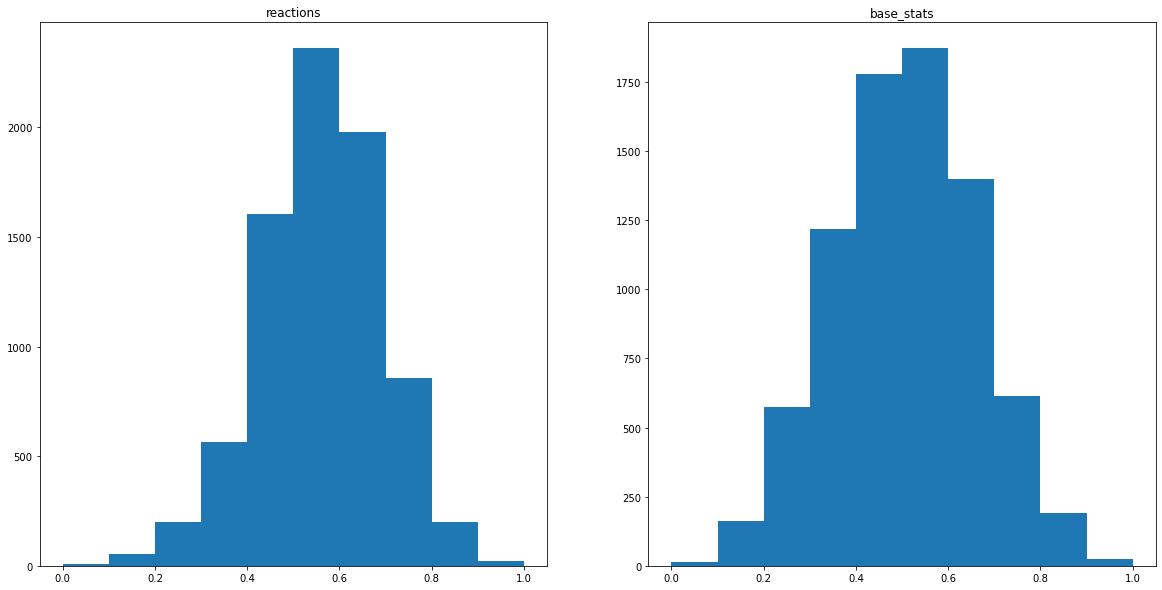

In [23]:
hist_maker(X_train_norm)

In [24]:
lm_1 = linear_model.LinearRegression()
lm_1.fit(X_train_norm,y_train)

LinearRegression()

In [25]:
y_pred_train = lm_1.predict(X_train_norm)
y_pred_test = lm_1.predict(X_test_norm)

R2_train_1 = r2_score(y_train, y_pred_train)
R2_test_1 = r2_score(y_test, y_pred_test)


print("R2 score por training is:", r2_score(y_train, y_pred_train))
print("MSE for training is:", mean_squared_error(y_train, y_pred_train))
print("RMSE for training is:", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("MAE for training is:", mean_absolute_error(y_train, y_pred_train))
print("MAPE for training is:", mean_absolute_percentage_error(y_train, y_pred_train))

print("------------------------")

print("R2 score por testing is:", r2_score(y_test, y_pred_test))
print("MSE for testing is:", mean_squared_error(y_test, y_pred_test))
print("RMSE for testing is:", np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("MAE for testing is:", mean_absolute_error(y_test, y_pred_test))
print("MAPE for testing is:", mean_absolute_percentage_error(y_test, y_pred_test))

R2 score por training is: 0.8429040622455338
MSE for training is: 7.4420954333025815
RMSE for training is: 2.7280204239159542
MAE for training is: 2.1343428974555123
MAPE for training is: 0.03261422634967656
------------------------
R2 score por testing is: 0.8397292622671345
MSE for testing is: 7.523261735669834
RMSE for testing is: 2.7428564919933076
MAE for testing is: 2.135987038479434
MAPE for testing is: 0.032782219804871116


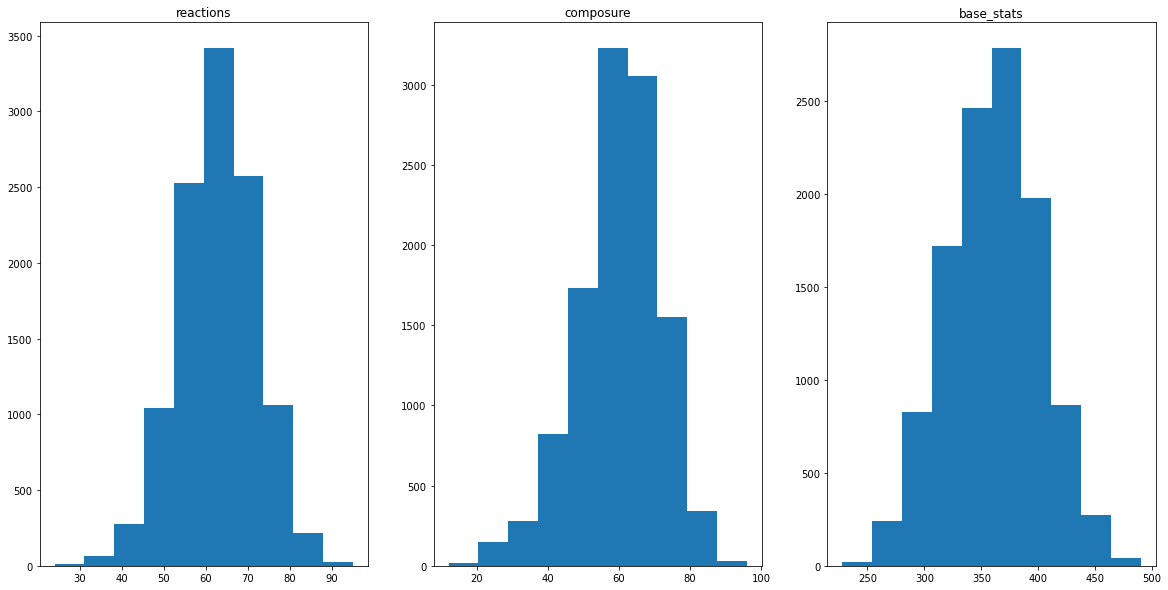

In [26]:
def hist_maker(df):
    cols = list(df.columns)
    x = len(cols)
    fig, ax = plt.subplots(1,x, figsize=(20,10))
    
    for col in cols:
        y = cols.index(col)
        ax[y].hist(data=df, x=col)
        ax[y].set_title(col)
        
    return

hist_maker(X_2)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size=0.3, random_state=22)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7847, 3)
(3364, 3)
(7847, 1)
(3364, 1)


In [28]:
transformer = MinMaxScaler()
transformer.fit(X_train)
X_train_norm = transformer.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, columns=X_train.columns)
X_test_norm = transformer.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, columns=X_train.columns)
X_train_norm

,reactions,composure,base_stats
0,0.557143,0.609756,0.583969
1,0.657143,0.731707,0.641221
2,0.728571,0.743902,0.713740
3,0.657143,0.756098,0.553435
4,0.571429,0.621951,0.545802
...,...,...,...
7842,0.742857,0.756098,0.748092
7843,0.300000,0.439024,0.179389
7844,0.385714,0.512195,0.423664
7845,0.642857,0.719512,0.740458


In [29]:
lm_2 = linear_model.LinearRegression()
lm_2.fit(X_train_norm,y_train)

LinearRegression()

In [30]:
y_pred_train = lm_2.predict(X_train_norm)
y_pred_test = lm_2.predict(X_test_norm)

R2_train_2= r2_score(y_train, y_pred_train)
R2_test_2 = r2_score(y_test, y_pred_test)


print("R2 score por training is:", r2_score(y_train, y_pred_train))
print("MSE for training is:", mean_squared_error(y_train, y_pred_train))
print("RMSE for training is:", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("MAE for training is:", mean_absolute_error(y_train, y_pred_train))
print("MAPE for training is:", mean_absolute_percentage_error(y_train, y_pred_train))

print("------------------------")

print("R2 score por testing is:", r2_score(y_test, y_pred_test))
print("MSE for testing is:", mean_squared_error(y_test, y_pred_test))
print("RMSE for testing is:", np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("MAE for testing is:", mean_absolute_error(y_test, y_pred_test))
print("MAPE for testing is:", mean_absolute_percentage_error(y_test, y_pred_test))

R2 score por training is: 0.8494892662165829
MSE for training is: 7.130135002620361
RMSE for training is: 2.670231263883404
MAE for training is: 2.0966302637510155
MAPE for training is: 0.032011534022578364
------------------------
R2 score por testing is: 0.8467884565851513
MSE for testing is: 7.191896401931163
RMSE for testing is: 2.6817711315343753
MAE for testing is: 2.0988509110923
MAPE for testing is: 0.03217962169404998


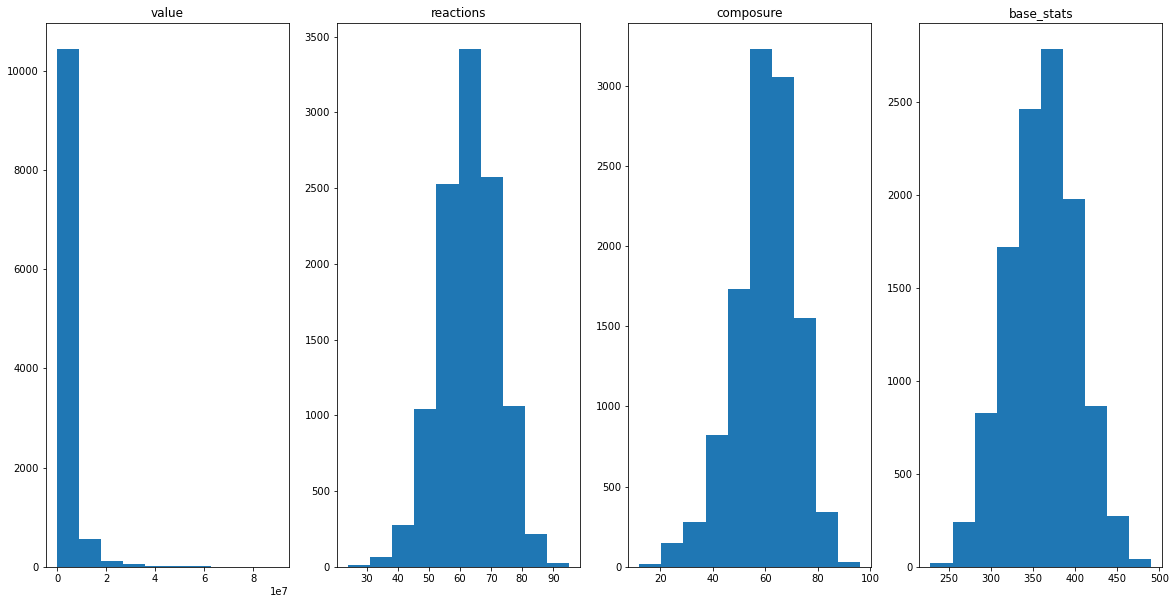

In [31]:
def hist_maker(df):
    cols = list(df.columns)
    x = len(cols)
    fig, ax = plt.subplots(1,x, figsize=(20,10))
    
    for col in cols:
        y = cols.index(col)
        ax[y].hist(data=df, x=col)
        ax[y].set_title(col)
        
    return

hist_maker(X_3)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_3, y, test_size=0.3, random_state=22)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7847, 4)
(3364, 4)
(7847, 1)
(3364, 1)


In [33]:
transformer = MinMaxScaler()
transformer.fit(X_train)
X_train_norm = transformer.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, columns=X_train.columns)
X_test_norm = transformer.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, columns=X_train.columns)
X_train_norm

,value,reactions,composure,base_stats
0,0.012222,0.557143,0.609756,0.583969
1,0.105556,0.657143,0.731707,0.641221
2,0.077778,0.728571,0.743902,0.713740
3,0.072222,0.657143,0.756098,0.553435
4,0.013333,0.571429,0.621951,0.545802
...,...,...,...,...
7842,0.105556,0.742857,0.756098,0.748092
7843,0.001111,0.300000,0.439024,0.179389
7844,0.003889,0.385714,0.512195,0.423664
7845,0.077778,0.642857,0.719512,0.740458


In [34]:
lm_3 = linear_model.LinearRegression()
lm_3.fit(X_train_norm,y_train)

LinearRegression()

In [35]:
y_pred_train = lm_3.predict(X_train_norm)
y_pred_test = lm_3.predict(X_test_norm)

R2_train_3= r2_score(y_train, y_pred_train)
R2_test_3 = r2_score(y_test, y_pred_test)


print("R2 score por training is:", r2_score(y_train, y_pred_train))
print("MSE for training is:", mean_squared_error(y_train, y_pred_train))
print("RMSE for training is:", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("MAE for training is:", mean_absolute_error(y_train, y_pred_train))
print("MAPE for training is:", mean_absolute_percentage_error(y_train, y_pred_train))

print("------------------------")

print("R2 score por testing is:", r2_score(y_test, y_pred_test))
print("MSE for testing is:", mean_squared_error(y_test, y_pred_test))
print("RMSE for testing is:", np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("MAE for testing is:", mean_absolute_error(y_test, y_pred_test))
print("MAPE for testing is:", mean_absolute_percentage_error(y_test, y_pred_test))

R2 score por training is: 0.8644436296811656
MSE for training is: 6.421702934684511
RMSE for training is: 2.5341079169373413
MAE for training is: 1.9728590934020402
MAPE for training is: 0.03026121073915893
------------------------
R2 score por testing is: 0.8610233164667439
MSE for testing is: 6.5236984627770696
RMSE for testing is: 2.5541531791920917
MAE for testing is: 1.9823872892891832
MAPE for testing is: 0.03051478598652278


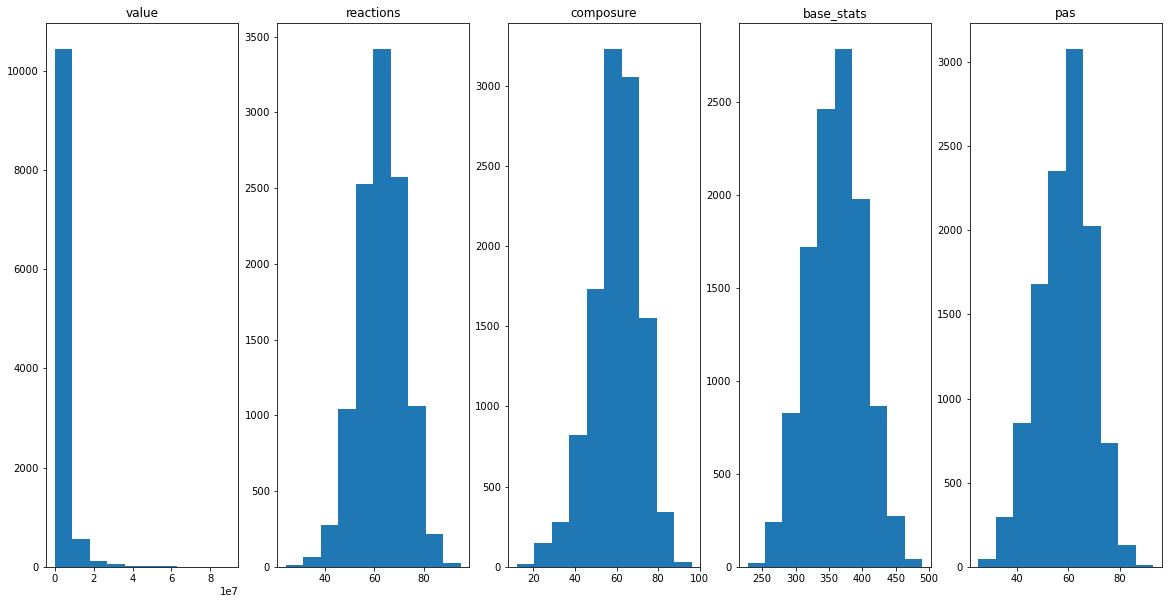

In [36]:
def hist_maker(df):
    cols = list(df.columns)
    x = len(cols)
    fig, ax = plt.subplots(1,x, figsize=(20,10))
    
    for col in cols:
        y = cols.index(col)
        ax[y].hist(data=df, x=col)
        ax[y].set_title(col)
        
    return

hist_maker(X_4)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_4, y, test_size=0.3, random_state=22)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7847, 5)
(3364, 5)
(7847, 1)
(3364, 1)


In [38]:
transformer = MinMaxScaler()
transformer.fit(X_train)
X_train_norm = transformer.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, columns=X_train.columns)
X_test_norm = transformer.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, columns=X_train.columns)
X_train_norm

,value,reactions,composure,base_stats,pas
0,0.012222,0.557143,0.609756,0.583969,0.500000
1,0.105556,0.657143,0.731707,0.641221,0.602941
2,0.077778,0.728571,0.743902,0.713740,0.764706
3,0.072222,0.657143,0.756098,0.553435,0.485294
4,0.013333,0.571429,0.621951,0.545802,0.529412
...,...,...,...,...,...
7842,0.105556,0.742857,0.756098,0.748092,0.705882
7843,0.001111,0.300000,0.439024,0.179389,0.279412
7844,0.003889,0.385714,0.512195,0.423664,0.514706
7845,0.077778,0.642857,0.719512,0.740458,0.779412


In [39]:
lm_4 = linear_model.LinearRegression()
lm_4.fit(X_train_norm,y_train)

LinearRegression()

In [40]:
y_pred_train = lm_4.predict(X_train_norm)
y_pred_test = lm_4.predict(X_test_norm)

R2_train_4= r2_score(y_train, y_pred_train)
R2_test_4 = r2_score(y_test, y_pred_test)


print("R2 score por training is:", r2_score(y_train, y_pred_train))
print("MSE for training is:", mean_squared_error(y_train, y_pred_train))
print("RMSE for training is:", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("MAE for training is:", mean_absolute_error(y_train, y_pred_train))
print("MAPE for training is:", mean_absolute_percentage_error(y_train, y_pred_train))

print("------------------------")

print("R2 score por testing is:", r2_score(y_test, y_pred_test))
print("MSE for testing is:", mean_squared_error(y_test, y_pred_test))
print("RMSE for testing is:", np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("MAE for testing is:", mean_absolute_error(y_test, y_pred_test))
print("MAPE for testing is:", mean_absolute_percentage_error(y_test, y_pred_test))

R2 score por training is: 0.8646861461898674
MSE for training is: 6.410214216212807
RMSE for training is: 2.5318400850394966
MAE for training is: 1.9727761648702755
MAPE for training is: 0.03025197135764086
------------------------
R2 score por testing is: 0.8611354483375369
MSE for testing is: 6.518434885502649
RMSE for testing is: 2.5531225754950837
MAE for testing is: 1.9828994796787662
MAPE for testing is: 0.03052123011106475


In [41]:
print("MAPE for LM 1 train is:", R2_train_1)
print("MAPE for LM 1 test is:", R2_test_1)
print("MAPE for LM 2 train is:", R2_train_2)
print("MAPE for LM 2 test is:", R2_test_2)
print("MAPE for LM 3 train is:", R2_train_3)
print("MAPE for LM 3 test is:", R2_test_3)
print("MAPE for LM 4 train is:", R2_train_4)
print("MAPE for LM 4 test is:", R2_test_4)

MAPE for LM 1 train is: 0.8429040622455338
MAPE for LM 1 test is: 0.8397292622671345
MAPE for LM 2 train is: 0.8494892662165829
MAPE for LM 2 test is: 0.8467884565851513
MAPE for LM 3 train is: 0.8644436296811656
MAPE for LM 3 test is: 0.8610233164667439
MAPE for LM 4 train is: 0.8646861461898674
MAPE for LM 4 test is: 0.8611354483375369


Best model is LM 4